In [1]:
import matplotlib.pyplot as py
import seaborn as sb
import numpy as np
import pandas as pd

In [44]:
df = sb.load_dataset('tips')

In [46]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The dataset contains tips data from different customers females and males smokers and non smokers from days Thursday to Sunday, dinner or lunch and from different tables size

### We want to predict how much tip the waiter will earn based on other parameters

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [49]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


df.sample(5)

What is the hardest day to work ? (based on number of tables been served)

In [51]:
df.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


Lets find out what is the best day to work – maximum tips (sum and percents)

In [53]:
df2 = df.groupby('day').sum() # sum per day
df2.drop('size', inplace = True, axis = 1) # sum of size column is not relevant
df2['percent'] = df2['tip'] / df2['total_bill'] * 100 # add percents
df2 # Print dataframe

,total_bill,tip,percent
day,,,
Thur,1096.33,171.83,15.673201
Fri,325.88,51.96,15.944519
Sat,1778.40,260.40,14.642375
Sun,1627.16,247.39,15.203791


we can see that the tips are around 15% of the bill

who eats more (and tips more)? smokers or non smokers?

In [57]:
df3 = df.groupby('smoker').sum()
df3['percent'] = df3['tip'] / df3['total_bill'] * 100
df3

,total_bill,tip,size,percent
smoker,,,,
Yes,1930.34,279.81,224,14.495374
No,2897.43,451.77,403,15.592094


 group by day and table size

In [58]:
df4 = df.groupby(['day','size']).sum()
df4['percent'] = df4['tip'] / df4['total_bill'] * 100
df4.dropna() # drop null rows
df4

total_bill     tip    percent
day  size                               
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
     5            NaN     NaN        NaN
     6            NaN     NaN        NaN
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
     6            NaN     NaN        NaN
Sun  1            NaN     NaN        NaN
     2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905

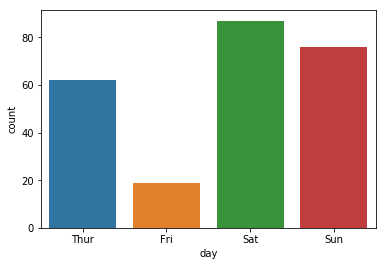

In [60]:
# Tables per day
sb.countplot(x = 'day', data = df)

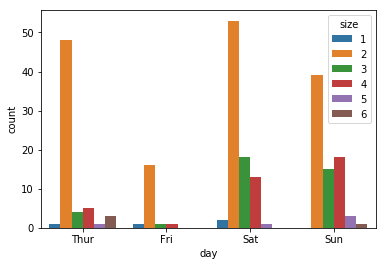

In [62]:
# Tables per day per size
sb.countplot(x = 'day', hue = 'size', data = df)

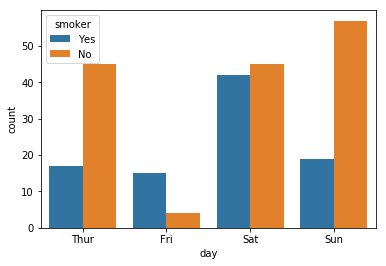

In [63]:
# Smokers or not
sb.countplot(x = 'day', hue = 'smoker', data = df)

Before we start building our model, we need to convert all the text values into numbers. We can do it in many ways:

- Using update statements
- Using replace method
- Iterate over the rows
- Use dummy variables

In [64]:
# convert sex and smoker columns to values
df.replace({ 'sex': {'Male': 0, 'Female': 1}, 'smoker': {'No': 0, 'Yes': 1}}, inplace = True)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


__Using dummy variables__

The values in day column are:  Thu, Fri, Sat, Sun we can convert it to 1,2,3,4 but to get a good model, it is better to use boolean variables. We can achieve it by converting the column into 4 columns – one for each day with 0 or 1 as values. In pandas library it can be done using get_dummies:

In [66]:
days = pd.get_dummies(df['day'])
days.sample(5)

,Thur,Fri,Sat,Sun
217,0,0,1,0
83,1,0,0,0
94,0,1,0,0
70,0,0,1,0
29,0,0,1,0


Actually we can drop one of the columns without loosing data – for example if we drop column ‘Thur’ we know that index 135 is Thur because all other days are 0. It is also supported by the same function

In [67]:
days = pd.get_dummies(df['day'], drop_first = True)
days.sample(6)

,Fri,Sat,Sun
170,0,1,0
117,0,0,0
59,0,1,0
42,0,0,1
139,0,0,0
143,0,0,0


In [70]:
times = pd.get_dummies(df['time'], drop_first = True)
times.sample(6)

,Dinner
80,0
18,1
176,1
184,1
40,1
12,1


concat all data frames, Also we don’t need the day and size columns anymore so we drop them

In [71]:
df = pd.concat([df, days, times], axis = 1)
df.drop(['day','time'], inplace = True, axis = 1)
df.head()

,total_bill,tip,sex,smoker,size,Fri,Sat,Sun,Dinner
0,16.99,1.01,1,0,2,0,0,1,1
1,10.34,1.66,0,0,3,0,0,1,1
2,21.01,3.50,0,0,3,0,0,1,1
3,23.68,3.31,0,0,2,0,0,1,1
4,24.59,3.61,1,0,4,0,0,1,1


__Building our Machine Learning model__  

Now we are ready to build the linear regression model.
We create a list of features as X and predicted as Y

In [72]:
X = df[['sex','smoker','size','Fri','Sat','Sun','Dinner']]
Y = df[['tip']]

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

split the data  70% – 30% into test and train so we can test our model before we use it

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 26)

In [76]:
# Train the model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
# predict the X_test values
predictions = model.predict(X_test)

We can now look at the predictions and compare it with Y_test

We can draw a graph to see the difference distribution:

C:\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


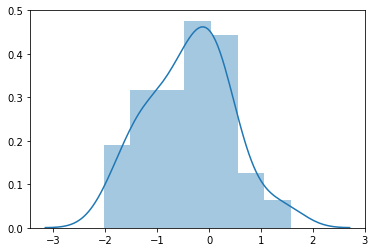

In [80]:
sb.distplot(Y_test - predictions)

We can see from the graph that most of the times the predictions were correct (difference = 0). We can continue working on the model , adding data and play with the parameters

If we want to predict new value for example

We have a 3 size table smoker male on friday lunch:

In [82]:
myvals = np.array([0, 1, 3, 1, 0, 0, 0]).reshape(1,-1)
model.predict(myvals)

array([[3.12444493]])

we expect to get 3.12$ tip

And the same table on dinner

In [83]:
myvals = np.array([0, 1, 3, 1, 0, 0, 0]).reshape(1,-1)
model.predict(myvals)

array([[3.12444493]])

We expect to get 3.73$